<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction


The dataset contains crime data from the City of Los Angeles from 2020 until the present. The data was found on data.gov and can be accessed either through [data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) or from the [City of Los Angeles's Open Data Portal](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

I chose this data because I thought it would be interesting to see trends in crimes, such as which crimes are most prevalent and if there are specific times of day/year where crime rates are more elevated. 

Date data accessed: November 6, 2023. 

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles.
* Missing value information.
* Any other relevant information about the dataset.  



In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# import data
crimes_df = pd.read_csv("C:/Users/Shoshana/Documents/CUNY SPS/Crime_Data_from_2020_to_Present.csv")

In [125]:
# preview data
crimes_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [126]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

The data consists of 829,778 entries (rows) and 27 columns. The description for each column can be seen on the LA Open Data website (linked above). There are quite a few missing values for some of the columns, such as those relating to victim information (`Vict Age`, `Vict Sex`) and weapon information (`Weapon Used Cd`, `Weapon Desc`). 

In [127]:
print(f"The average age of victims of crime in LA is {round(crimes_df['Vict Age'].mean(), 2)}. The median age of victims of crime is {round(crimes_df['Vict Age'].median(), 2)}.")
print(f"50% of victims of crime in LA are between the ages of {np.percentile(crimes_df['Vict Age'], 25)} and {np.percentile(crimes_df['Vict Age'], 75)} (IQR).")
print(f"The youngest victim in the dataset is {crimes_df['Vict Age'].min()}. The oldest victim is {crimes_df['Vict Age'].max()}.")

The average age of victims of crime in LA is 29.79. The median age of victims of crime is 31.0.
50% of victims of crime in LA are between the ages of 6.0 and 45.0 (IQR).
The youngest victim in the dataset is -3. The oldest victim is 120.


Based on the age range (-3, 120), there must have been some ages which were entered incorrectly.

How many areas are mentioned in the dataset?

In [128]:
crimes_df['AREA'].nunique()     # number of unique areas

21

How many crimes?

In [129]:
crimes_df['Crm Cd Desc'].nunique()

138

How many types of weapons?

In [130]:
crimes_df['Weapon Desc'].nunique()

79

Number of crimes in each area?

In [131]:
areas_count = crimes_df['AREA NAME'].value_counts().reset_index()       # number of times each area is mentioned in the dataframe
areas_count

,AREA NAME,count
0,Central,55923
1,77th Street,52362
2,Pacific,48582
3,Southwest,46494
4,Hollywood,43959
5,Southeast,42268
6,Olympic,41880
7,Newton,41630
8,N Hollywood,41259
9,Wilshire,39459


Top crime for each area?

In [132]:
crimes_per_area = crimes_df.groupby('AREA NAME')['Crm Cd Desc'].value_counts().reset_index()        # count of crimes per area

# grab top crime for each area
count = 0
for area in crimes_df['AREA NAME'].unique():
    crime_area = crimes_per_area[crimes_per_area['AREA NAME'] == area]      # filter based on area
    if count == 0:      # condition only for first area 
        top_crime_by_area = crime_area.head(1)      # initiate dataframe
    else:
        top_crime_by_area = pd.concat([top_crime_by_area, crime_area.head(1)])      # bind next area to top_crimes_by_area df
    count+=1

top_crime_by_area = top_crime_by_area.reset_index(drop=True)
top_crime_by_area

,AREA NAME,Crm Cd Desc,count
0,Southwest,VEHICLE - STOLEN,5027
1,Central,BURGLARY FROM VEHICLE,7780
2,N Hollywood,VEHICLE - STOLEN,3834
3,Mission,VEHICLE - STOLEN,4501
4,Devonshire,VEHICLE - STOLEN,3074
5,Northeast,VEHICLE - STOLEN,4225
6,Harbor,VEHICLE - STOLEN,4760
7,Van Nuys,VEHICLE - STOLEN,3529
8,West Valley,VEHICLE - STOLEN,3301
9,West LA,BURGLARY,3923


The top crime in most areas is vehicle theft. 

How many victims of each sex?

In [133]:
crimes_df['Vict Sex'].value_counts().reset_index()

,Vict Sex,count
0,M,342350
1,F,305479
2,X,72559
3,H,90
4,-,1


Of each race/origin?

In [134]:
crimes_df['Vict Descent'].value_counts().reset_index()

,Vict Descent,count
0,H,254505
1,W,168980
2,B,118097
3,X,80124
4,O,65732
5,A,18161
6,K,4422
7,F,3450
8,C,3192
9,J,1151


From the data dictionary: A - Other Asian, B - Black, C - Chinese, D - Cambodian, F - Filipino, G - Guamanian, H - Hispanic/Latin/Mexican, I - American Indian/Alaskan Native, J - Japanese, K - Korean, L - Laotian, O - Other, P - Pacific Islander, S - Samoan, U - Hawaiian, V - Vietnamese, W - White, X - Unknown, Z - Asian Indian.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

From the preview of the data, each date in `Date Rept` and `DATE OCC` have "12:00:00 AM" as the time. However, there is a separate column, `TIME OCC` with the military time that each event occured. Also, from the dataframe information, the date columns are cast as objects and not dates. Let's change these columns to be dates.

In [135]:
# function to clean and covert to date type
def clean_and_convert(string_date):
    string_date_cleaned = string_date.replace(' 12:00:00 AM', '')
    return datetime.strptime(string_date_cleaned, '%m/%d/%Y').date()

# clean and recast date columns
crimes_df['Date Rptd'] = crimes_df['Date Rptd'].apply(clean_and_convert)
crimes_df['DATE OCC'] = crimes_df['DATE OCC'].apply(clean_and_convert)

Let's extract the hour of day that each crime was committed. 

In [136]:
# function to extract the hour
def extract_hour(time):
    time = str(time)
    if len(time) == 2:
        return(0)
    elif len(time) == 3:
        return int(time[0])
    else:
        return(int(time[:2]))

# extract hour into new column
crimes_df['hour'] = crimes_df['TIME OCC'].apply(extract_hour)

According to the data dictionary, the sexes in the dataset are: M - Male, F - Female, X - Unknown. However, in the count for sex, there is also an H category. I am unsure what this stands for, so I will replace this, as well as the "-" character with "X" for unknown. 

In [137]:
# function to replace unknown sex
def fix_sex(sex):
    if sex in ['M', 'F']:
        return sex
    else:
        return 'X'
        
crimes_df['Vict Sex'] = crimes_df['Vict Sex'].apply(fix_sex)

To make it easier to identify the race of each victim, let's replace the letter code for each race with the actual description of each race.

In [138]:
# dictionary for replacement
race_dict = {'A':'Other Asian', 
             'B':'Black', 
             'C':'Chinese', 
             'D':'Cambodian', 
             'F':'Filipino', 
             'G':'Guamanian', 
             'H':'Hispanic/Latin/Mexican', 
             'I':'American Indian/Alaskan Native', 
             'J':'Japanese', 
             'K':'Korean', 
             'L':'Laotian',
             'O':'Other', 
             'P':'Pacific Islander', 
             'S':'Samoan', 
             'U':'Hawaiian', 
             'V':'Vietnamese', 
             'W':'White', 
             'X':'Unknown', 
             'Z':'Asian Indian',
             '-':'Uknown'}

# replace in dataframe
crimes_df['Vict Descent'] = crimes_df['Vict Descent'].replace(race_dict)

Let's also order the dataframe based on the date that the crime occured.

In [139]:
crimes_df = crimes_df.sort_values('DATE OCC').reset_index(drop=True)

# preview cleaned dataframe
crimes_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,hour
0,201713726,2020-09-28,2020-01-01,1,17,Devonshire,1797,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,Invest Cont,812.0,NaN,NaN,NaN,8900 WOODLEY AV,NaN,34.2281,-118.4913,1
1,201204073,2020-01-01,2020-01-01,1030,12,77th Street,1269,2,623,BATTERY POLICE (SIMPLE),...,Adult Arrest,623.0,NaN,NaN,NaN,AVALON,80TH ST,33.9665,-118.2651,10
2,201707332,2020-03-13,2020-01-01,1500,17,Devonshire,1761,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,9300 TOPANGA CANYON BL,NaN,34.2391,-118.6061,15
3,201204157,2020-01-02,2020-01-01,1,12,77th Street,1258,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7600 S BROADWAY,NaN,33.9708,-118.2783,1
4,201204056,2020-01-01,2020-01-01,300,12,77th Street,1245,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,6600 S NORMANDIE AV,NaN,33.9792,-118.3003,3


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

#### Victim Analysis

How many victims there are in the dataset from each sex (M - Male, F - Female, X - Unknown).

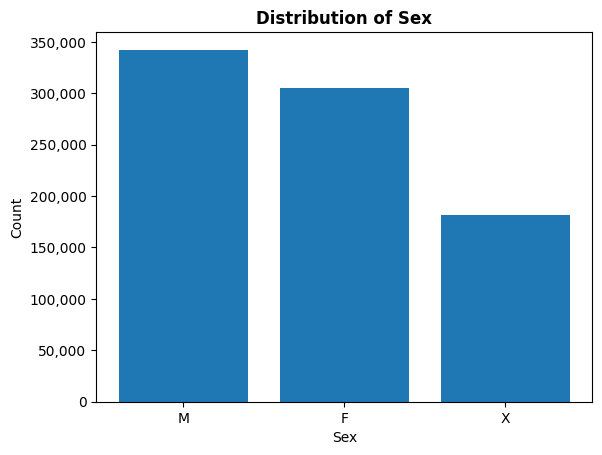

In [140]:
# dataframe to count vict sex
crimes_per_vict_sex = crimes_df['Vict Sex'].value_counts().reset_index()

# barplot
plt.bar(crimes_per_vict_sex['Vict Sex'], crimes_per_vict_sex['count'])

# axis labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex', fontweight='bold')

# format y-axis with commas
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# show plot
plt.show()

More males have reported crimes than females. 

How many victims are there from each race?

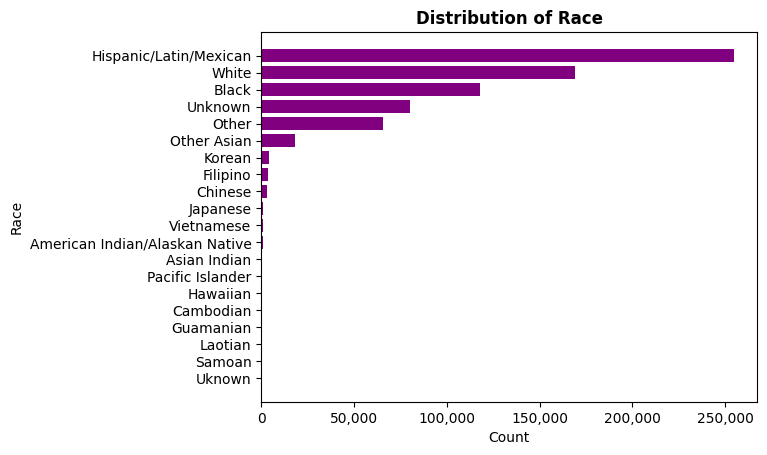

In [141]:
# dataframe to count vict race
crimes_per_vict_race = crimes_df['Vict Descent'].value_counts().reset_index().sort_values('count', ascending = True)

# horizontal bar plot
plt.barh(crimes_per_vict_race['Vict Descent'], crimes_per_vict_race['count'], color = 'purple')

plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Distribution of Race', fontweight='bold')

# format x-axis with commas
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

Hispanic/Latin/Mexicans have reported the most crimes against them. 

#### Time Related Analysis

Are there any times of year/day when crime is elevated?

In [142]:
# data prep
# crime by date
crime_by_date = crimes_df['DATE OCC'].value_counts().reset_index().sort_values('DATE OCC')

# average for each month
crime_by_date['year'] = crime_by_date['DATE OCC'].apply(lambda x: 'Yr ' + str(x.year))
crime_by_date['month'] = crime_by_date['DATE OCC'].apply(lambda x: x.month)
crime_by_month = crime_by_date.groupby(['year','month']).mean('count').reset_index()
crime_by_month_wide = crime_by_month.pivot(index="month", columns="year", values="count").reset_index()     # wide format - plot separate years

# crime by time
crimes_df['year'] = crimes_df['DATE OCC'].apply(lambda x: 'Yr ' + str(x.year))
crime_by_time = crimes_df.groupby(['year','hour']).size().reset_index(name='count')
crime_by_time_wide = crime_by_time.pivot(index="hour", columns="year", values="count").reset_index()

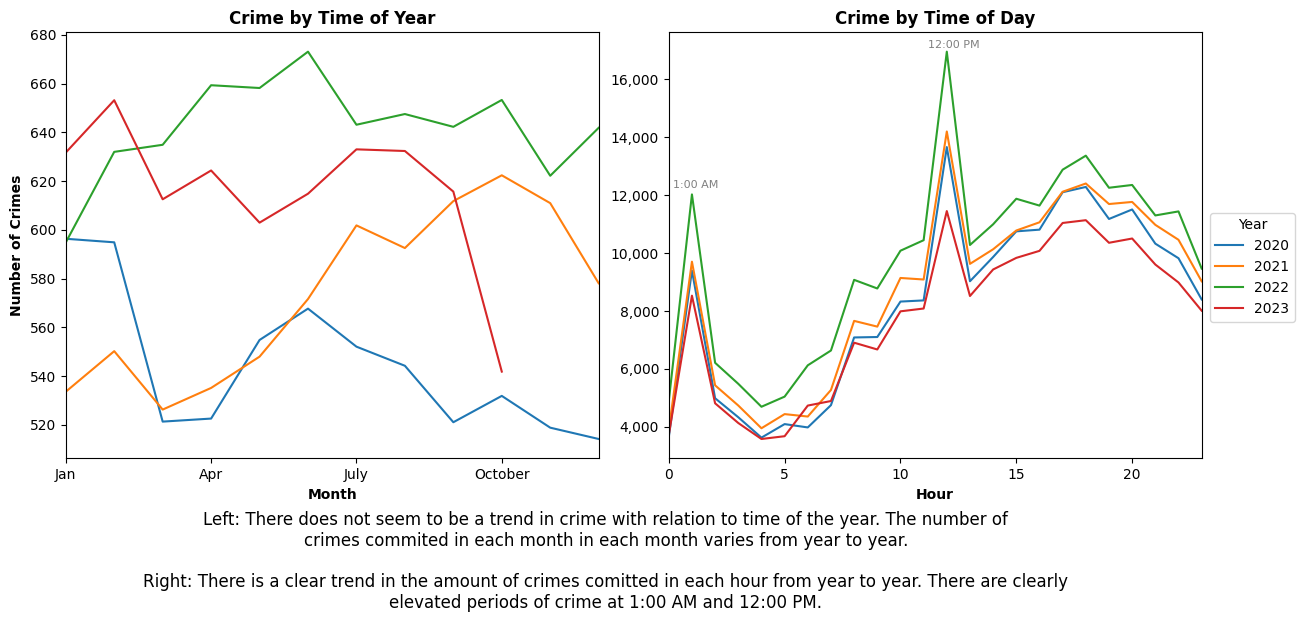

In [143]:
# side by side plots
fig, ax = plt.subplots(1, 2, figsize = (12,5), layout = 'constrained')      # side by side plots

# plot 1 - crime by time of year
ax[0].plot(crime_by_month_wide['month'], crime_by_month_wide['Yr 2020'], label = '2020')    # plot and label for each year
ax[0].plot(crime_by_month_wide['month'], crime_by_month_wide['Yr 2021'], label = '2021')
ax[0].plot(crime_by_month_wide['month'], crime_by_month_wide['Yr 2022'], label = '2022')
ax[0].plot(crime_by_month_wide['month'], crime_by_month_wide['Yr 2023'], label = '2023')

# set limits for x-axis
ax[0].set_xlim((1, 12))     

# set specific x-axis ticks and relabel
ax[0].set_xticks([1, 4, 7, 10])
ax[0].set_xticklabels(['Jan','Apr','July','October'])

# title and axis labels
ax[0].set_title('Crime by Time of Year', fontweight='bold')
ax[0].set_xlabel('Month', fontweight='bold')
ax[0].set_ylabel('Number of Crimes', fontweight='bold')

# include legend
fig.legend(bbox_to_anchor=(1.08, .6), title='Year')

# plot 2 - crime by time of year
ax[1].plot(crime_by_time_wide['hour'], crime_by_time_wide['Yr 2020'], label = '2020')
ax[1].plot(crime_by_time_wide['hour'], crime_by_time_wide['Yr 2021'], label = '2021')
ax[1].plot(crime_by_time_wide['hour'], crime_by_time_wide['Yr 2022'], label = '2022')
ax[1].plot(crime_by_time_wide['hour'], crime_by_time_wide['Yr 2023'], label = '2023')

ax[1].set_xlim((0,23))
ax[1].set_title('Crime by Time of Day', fontweight='bold')
ax[1].set_xlabel('Hour', fontweight='bold')

# add data labels for the elevated times
ax[1].yaxis.set_major_formatter('{x:,.0f}')
ax[1].annotate('1:00 AM', (0.2, 12250), fontsize=8, color='grey')
ax[1].annotate('12:00 PM', (11.2, 17100), fontsize=8, color='grey')

# add figure explanations
plt.suptitle('Left: There does not seem to be a trend in crime with relation to time of the year. The number of\ncrimes commited in each month in each month varies from year to year.\n \nRight: There is a clear trend in the amount of crimes comitted in each hour from year to year. There are clearly\nelevated periods of crime at 1:00 AM and 12:00 PM.', x = .5, y = -.01)

plt.show()

From the graph by time of year, 2020 had the lowest number of crimes of any year, probably owing to Covid-19 lockdowns. There is a dip from February to March of 2020, when lockdowns began. Crime starts to increase again from the beginning of 2021, when Covid restrictions were lightening. 

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

#### Victim Analysis

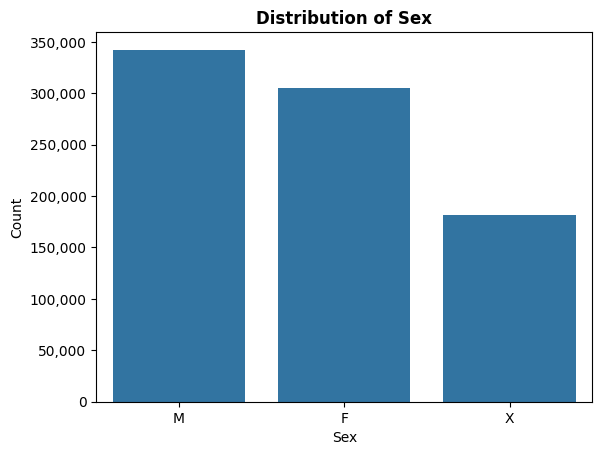

In [144]:
# countplot for victim sex
ax = sns.countplot(data = crimes_df, x = 'Vict Sex', order = crimes_df['Vict Sex'].value_counts().index)    # order by descending count --> match matplotlib version

# label axes and title
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sex', fontdict={'weight':'bold'})

# format y-axis - commas
ax.get_yaxis().set_major_formatter('{x:,.0f}')

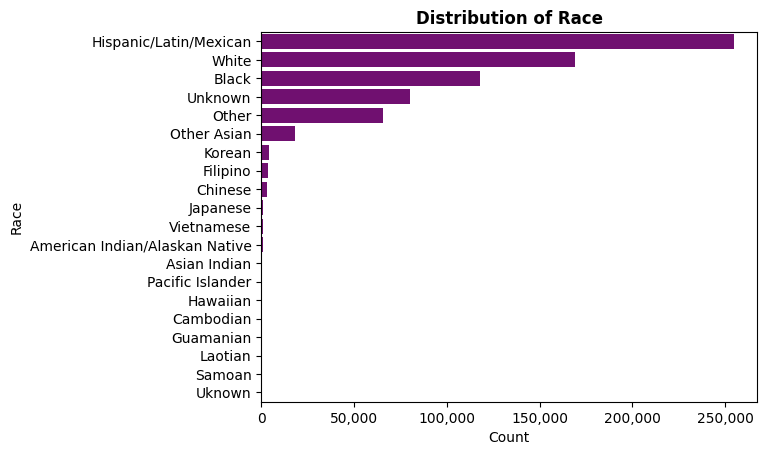

In [145]:
# countplot for victim race
ax = sns.countplot(data = crimes_df, y = 'Vict Descent', order = crimes_df['Vict Descent'].value_counts().index, color='purple')    # order by descending count --> match matplotlib version

# axes and title
ax.set_xlabel('Count')
ax.set_ylabel('Race')
ax.set_title('Distribution of Race', fontdict={'weight':'bold'})

# format y-axis with commas
ax.get_xaxis().set_major_formatter('{x:,.0f}')

#### Time Related Analysis

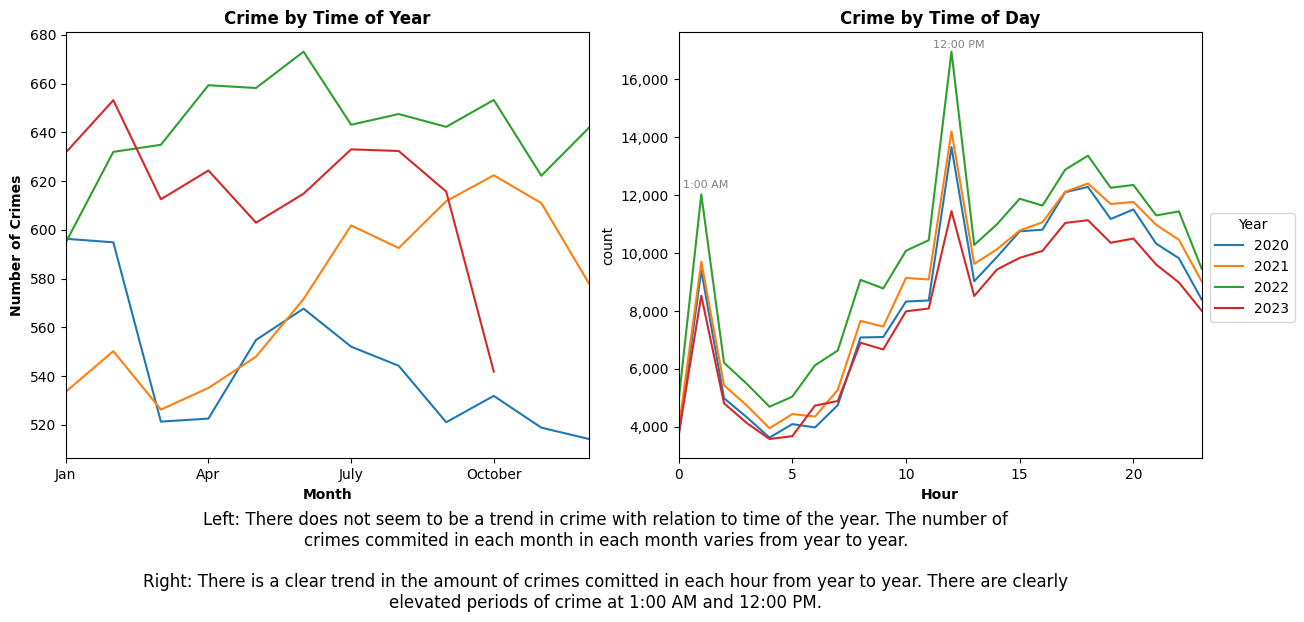

In [146]:
crime_by_month['year'] = crime_by_month['year'].str.replace('Yr ', '')
crime_by_time['year'] = crime_by_time['year'].str.replace('Yr ', '')

fig, ax = plt.subplots(1, 2, figsize = (12,5), layout = 'constrained') 

# plot 1 recreattion 
sns.lineplot(data=crime_by_month, x = 'month', y = 'count', hue='year', ax=ax[0]).legend().remove()      # remove built in legend (will replace in same position as matplotlib visual)
    
ax[0].set_xlim((1,12))      # set x-axis limits

# set specific x-axis ticks and relabel
ax[0].set_xticks([1, 4, 7, 10])
ax[0].set_xticklabels(['Jan','Apr','July','October'])

# title and axis labels
ax[0].set_title('Crime by Time of Year', fontweight='bold')
ax[0].set_xlabel('Month', fontweight='bold')
ax[0].set_ylabel('Number of Crimes', fontweight='bold')

# include legend
fig.legend(bbox_to_anchor=(1.08, .6), title='Year')

# plot 2 recreation
sns.lineplot(data=crime_by_time, x = 'hour', y = 'count', hue='year', ax=ax[1]).legend().remove()

ax[1].set_xlim((0,23))

ax[1].set_title('Crime by Time of Day', fontweight='bold')
ax[1].set_xlabel('Hour', fontweight='bold')

# add data labels for the elevated times
ax[1].yaxis.set_major_formatter('{x:,.0f}')
ax[1].annotate('1:00 AM', (0.2, 12250), fontsize=8, color='grey')
ax[1].annotate('12:00 PM', (11.2, 17100), fontsize=8, color='grey')

# add figure explanations
plt.suptitle('Left: There does not seem to be a trend in crime with relation to time of the year. The number of\ncrimes commited in each month in each month varies from year to year.\n \nRight: There is a clear trend in the amount of crimes comitted in each hour from year to year. There are clearly\nelevated periods of crime at 1:00 AM and 12:00 PM.', x = .5, y = -.01)

plt.show()

### **Part 3:**

Explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Based on the above plots, matplotlib is a lot more manual than seaborn. Seaborn is made to easily work with pandas dataframes and series. There is a "data" parameter in seaborn plots so that you can supply the dataframe and easily call the columns you are wanting to visualize. Matplotlib is not made to work with dataframes, so you have to supply the x and y by calling each column from the dataframe individually.

There is also a "hue" parameter in seaborn which allows you to specify a column with which to split up the visualizations into different colors. This way, one can use a long format dataframe for their visualization.  There is no equivalence to this (at least to my knowledge) with matplotlib. In order to use color to differentiate in matplotlib, you need to add each line individually. For the side by side plots that I created for crime vs. time perdiods, I used a wide format table for the matplotlib visualization so that there would be a column for each year. I then added each line individually, labeling each so that they would appear in a color legend. For the seaborn recreation, I was able to specify "hue='year'" in the seaborn plot function and seaborn split the colors itself. The "hue" parameter from seaborn witll automatically place a color legend in the plot, but with matplotlib you need to specify 'plt.legend()' in order for it to show up.

Another difference between the two is that, with matplotlib, you need to call 'plt.show()' at the end of the code so that the plot will be shown. With seaborn, the plot is automatically shown without this line. For the plots in the victim analysis, I used 'plt.show()' to execute the plots in matplotlib but this line was not needed with the seaborn recreations. 

Also in the victim analysis section, since matplotlib is not made to easily work with dataframes, there is no version of a count plot like there is with seaborn. Because of this, I have to create a dataframe with the victim sex/race and the counts for each. With seaborn, I was just able to call the victim sex/race column as my x/y variable and use `sns.counplot()` to visualize the counts from the original dataframe. 

Seaborn is built on top of matplotlib, so the two libraries can be integrated into one plot. For this reason, you can generate a plot with seaborn's library and then make use of the more customizable aspects of matplotlib's library. For example, when you use the "hue" parameter of seaborn, it automatically places a legend in the plot. However, in order to recreate the matplotlib visual that I created, I needed to move the color legend to outside the plot. For this reason, I removed the automatically generated color legend from each of the seaborn recreations and used matplotlib to manually place a color legend next to the plots. 

There are also slightly diffrent ways to specify the same action between matplotlib and seaborn. For example, with matplotlib, when setting a title, you can use "fontweight='bold'" to bold the title. In seaborn, you need to use a dictionary to do this same actions ('fontdict={'weight':'bold}). You can add more specifications in this dictionary, such as font size, but this dictionary is unecessary in matplotlib. 

The main difference between the two libraries is that matplotlib is not made to work with dataframes and is much more customizable while seaborn is made to easily work with dataframes but is not as flexible as matplotlib. Therefore, I used both libraries in the seaborn recreation of my side by side plot, as I created the graphs with seaborn but then used matplotlib to perform some of the customizations that I was unable to do with seaborn itself. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Car theft was the highest reported crime in the dataset across most of the areas. Other forms of burglary were the highest in other areas. 

Based on the fact that this is only a dataset of reported crimes that occured, from the victim analysis it appears that males either have more crime done against them or are just more likely to report crimes against them than females. It also appears that hispanic/latin/mexican people either also have more crimes done against them or are more likely to report.

While there does not seem to be an overall trend in crime based on the time of the year (i.e. month), it seems that crime either decreased during Covid lockdowns or was just undereported during this time. 

There does seem to be an overall trend in the amount of crime per time of the day (i.e. hour), as all four years follow basically the same exact pattern. Crime is elevated at around 1:00 AM and 12:00 PM. Crime also seems to increase between the hours of 5:00 AM till about 5:00 PM and then decreases.  